### Introduction to regression

* Apply transformations to make target variable more normally distrbuted for Regression
* Apply inverse transformations to be able to use dthese in a regression context

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
with open('boston_housing_clean.pickle', 'rb') as f:
    boston_housing = pd.read_pickle(f)
    

In [14]:
df = boston_housing['dataframe']
df_description = boston_housing['description']

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
df_description

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [17]:
df.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [20]:
df["MEDV"].hist(bins=30, edgecolor='black')

<Axes: >

### Using a Statistial test
* We will try to find out the p value for the specific column so that the normal distribution  can be checked
* Higher the P value; closer the distribution is to normal

In [21]:
from scipy.stats.mstats import normaltest
normaltest(df["MEDV"].values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

#### Since the P Value turns out to be extremely low, we need to apply transformations to our "Y- Value"
The common transformations here are:
* Log Transformation
* Square root Transformation
* Box Cox Transformation

### Log transformation

In [27]:
def plot_exponential_data():
    data = np.exp(np.random.normal(size = 1000))
    plt.hist(data)
    plt.show()
    return data



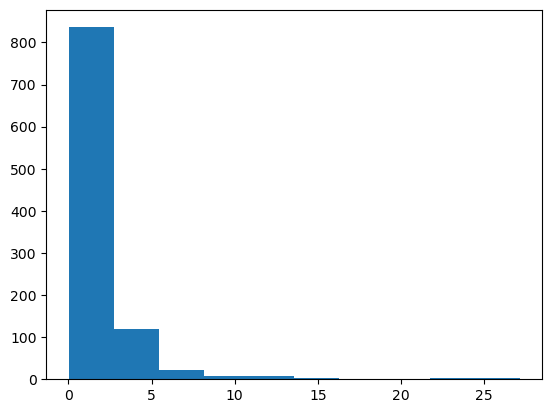

In [28]:
data = plot_exponential_data()

In [ ]:
log_medv = np.log(df.MEDV)

normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

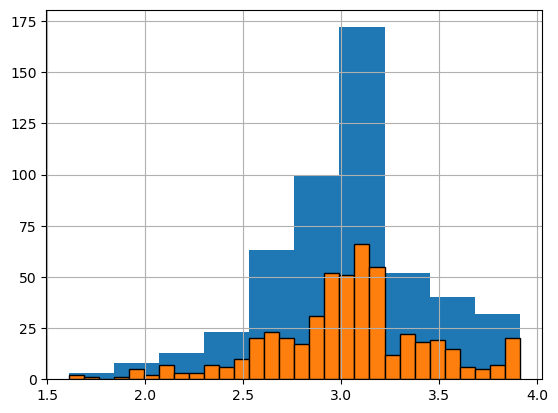

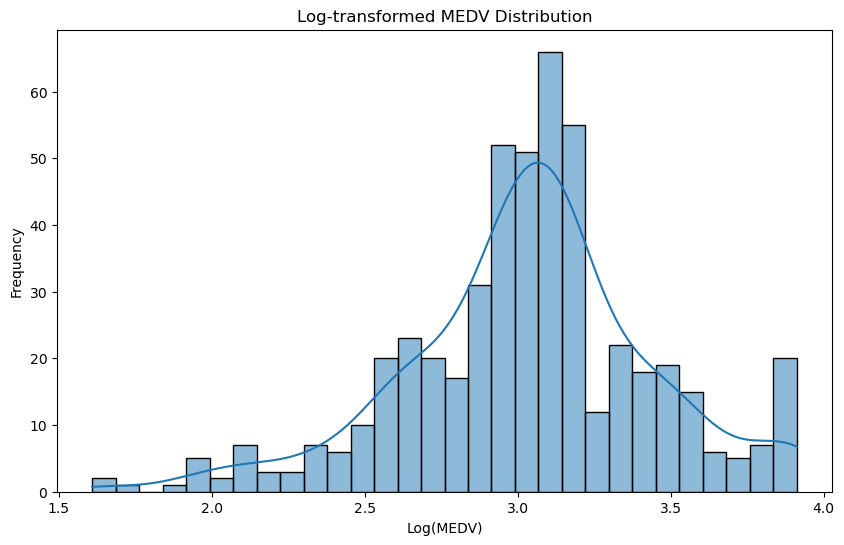

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(log_medv, kde=True, bins=30, edgecolor='black')
plt.title('Log-transformed MEDV Distribution')
plt.xlabel('Log(MEDV)')
plt.ylabel('Frequency')
plt.show()

#### The data is close to the normal distribution  but still not completely normal

### Square root transformation

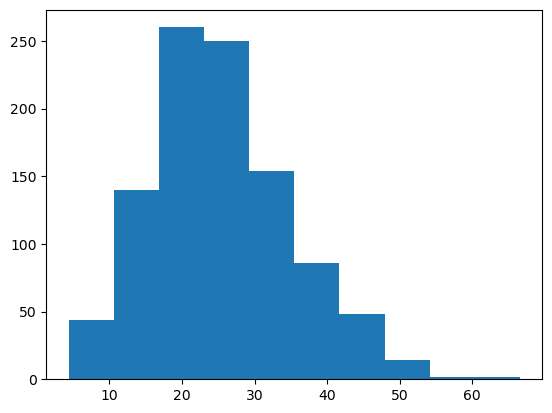

In [32]:
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size = 1000))
    plt.hist(data)
    plt.show()
    return data
data = plot_square_normal_data()

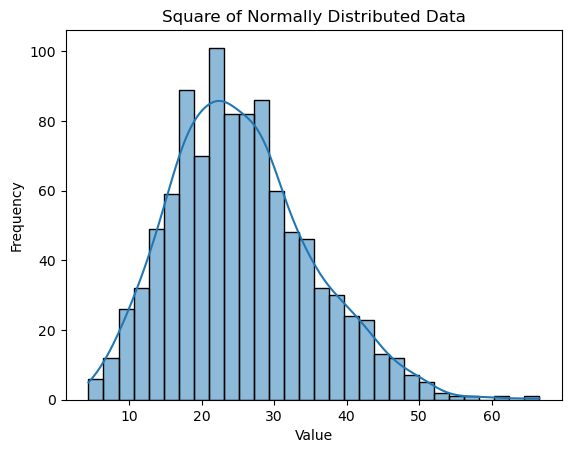

In [36]:
sns.histplot(data, kde=True, bins=30, edgecolor='black')
plt.title('Square of Normally Distributed Data')    
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [42]:
sqrt_medv = np.sqrt(df['MEDV'])
plt.hist(sqrt_medv, bins=30, edgecolor='black')
normaltest(sqrt_medv)


NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

#### Box Con Transformation
* It is a parameterized transformation that tries to get distribution as close to a normal distribution as possible

In [43]:
from scipy.stats import boxcox
bc_result = boxcox(df['MEDV'])
boxcon_medv = bc_result[0]
lambda_value = bc_result[1]

In [45]:
lambda_value


0.21662090066621686

In [46]:
df['MEDV'].hist()

<Axes: >

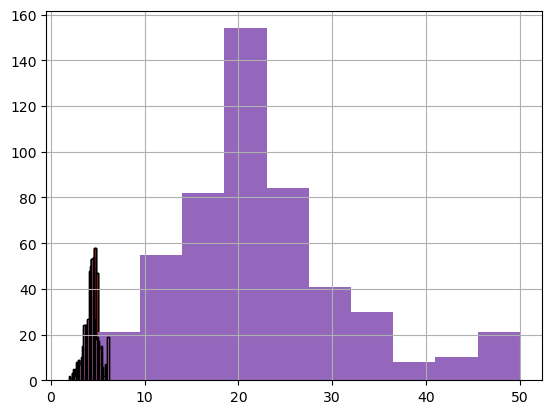

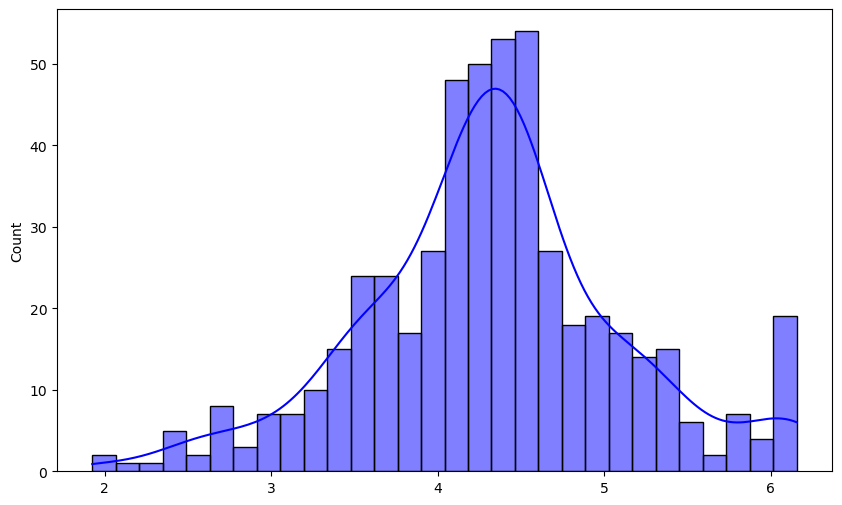

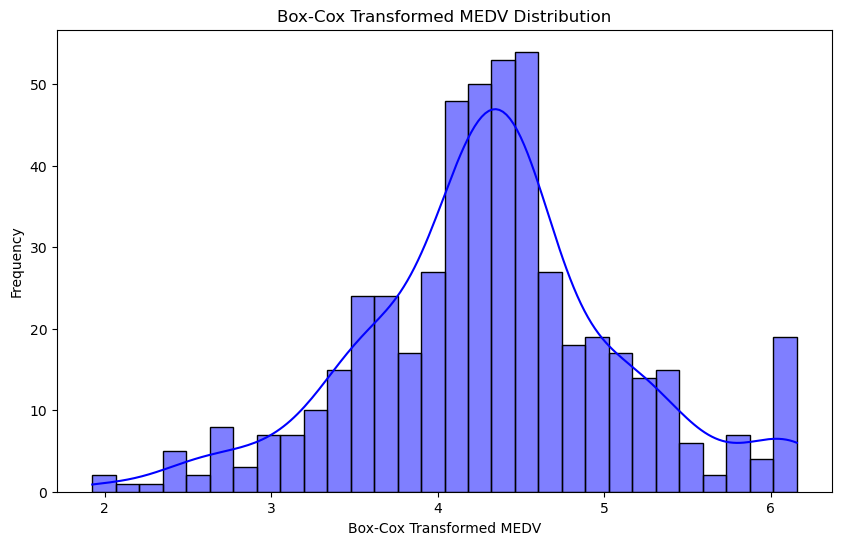

NormaltestResult(statistic=4.513528777459223, pvalue=0.10468866918093565)

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(boxcon_medv, kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Box-Cox Transformed MEDV Distribution')
plt.xlabel('Box-Cox Transformed MEDV')
plt.ylabel('Frequency')
plt.show()
#plt.hist(boxcon_medv, bins=30, edgecolor='black')
normaltest(boxcon_medv)

### Testing Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

lr = LinearRegression()

In [52]:
y_col = 'MEDV'
X = df.drop(columns=[y_col])
y = df[y_col]

In [53]:
#Creating Polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
x_pf = pf.fit_transform(X)

In [54]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pf, y, test_size=0.25, random_state=42)

In [56]:
#Normalizing the data using StandardScaler on X_train
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)

In [57]:
# Normalizing the target variable y_train using boxcon
bc_result_2 = boxcox(y_train)
boxcon_y_train = bc_result_2[0]
lambda_value_2 = bc_result_2[1]

In [58]:
#Fitting the regression model
lr.fit(X_train_scaled, boxcon_y_train)
# Making predictions on the test set
X_test_scaled = s.transform(X_test)
y_pred = lr.predict(X_test_scaled)

In [60]:
"""
Every transformation has an inverse function, which can be used to transform the predictions back to the original scale.
Here we will use boxcox transformation's inverse function to transform the predictions back to the original scale.
"""
from scipy.special import inv_boxcox
inv_boxcox(boxcon_medv, lambda_value_2)[:10]
df['MEDV'][:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

Mean Squared Error: 12.663114191602746
R^2 Score: 0.8191684890916229


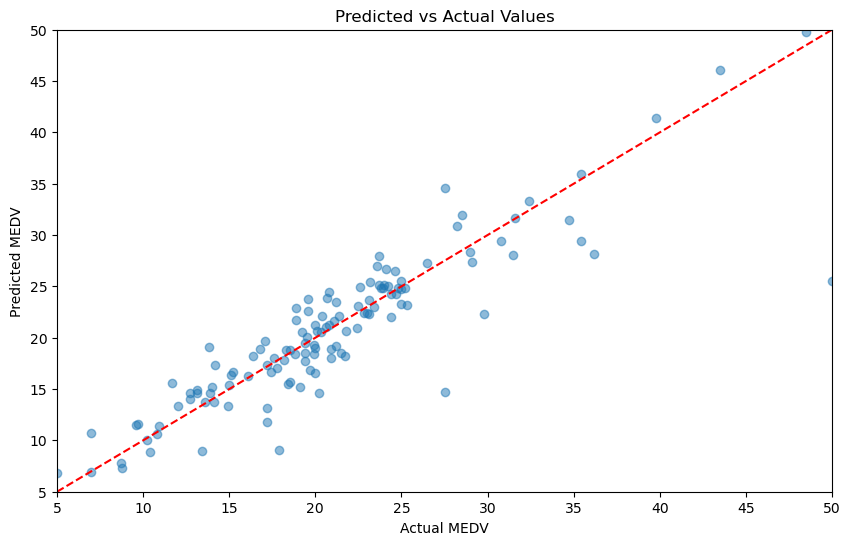

In [62]:
#calculating the r2 score and mean squared error
y_pred_transformed = inv_boxcox(y_pred, lambda_value_2)
mse = mean_squared_error(y_test, y_pred_transformed)
r2 = r2_score(y_test, y_pred_transformed)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_transformed, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.show()

Mean Squared Error without Box-Cox: 22.131677894303227
R^2 Score without Box-Cox: 0.6839557243179337


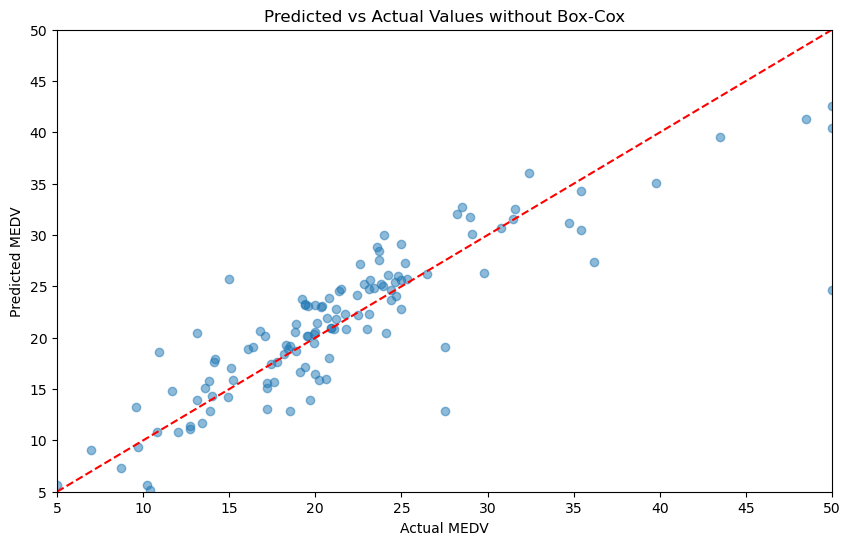

In [63]:
#Determinnig ther2 and mse without the boxcox transformation
lr = LinearRegression()
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#Normalizing the data using StandardScaler on X_train
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
#Fitting the regression model
lr.fit(X_train_scaled, y_train)
# Making predictions on the test set
X_test_scaled = s.transform(X_test)
y_pred = lr.predict(X_test_scaled)
#calculating the r2 score and mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error without Box-Cox: {mse}")
print(f"R^2 Score without Box-Cox: {r2}")   
# Plotting the predicted vs actual values without Box-Cox transformation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values without Box-Cox')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()
